In [1]:
%load_ext autoreload
%autoreload 2

This follows the setup of ppd_y1_data.ipynb, but there are some different configurations.  This particular notebook has locations set to the Ohio Supercomputer (and some things like the sys.path.append call below are unnecessary if you are in the `ppd/postprocessing directory`).

In [2]:
import sys
#sys.path.append("/users/PCON0003/cond0080/src/y3-3x2pt-ppd/postprocessing")
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits

from tqdm.auto import tqdm, trange

import castor as ca
import pickle

In [3]:
path_ppd = '../'
# path_chain = '../../trimmed_chains/'
path_chain = '../../trimmed_chains_test/'
# path_chain = '/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/'
path_dv = '../../../data/des-y3/'

DATAFILE = '2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'

fiducial_dv = '2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'

In [4]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 3x2 goodness of fit

In [96]:
a = np.loadtxt('../../trimmed_chains/chain_3x2lcdm_0321_boosted.txt')

with open('../../trimmed_chains/chain_3x2lcdm_0321_boosted.txt', 'r') as f:
    header = f.readline()
    
np.savetxt('../../trimmed_chains_test/chain_3x2lcdm_0321_boosted.txt', a[:200000], header=header[2:-1])

In [97]:
with open('../../trimmed_chains_test/chain_3x2lcdm_0321_boosted.txt', 'r') as f:
    print(f.readline())#[1:].split())

# cosmological_parameters--omega_m cosmological_parameters--h0 cosmological_parameters--omega_b cosmological_parameters--n_s cosmological_parameters--a_s cosmological_parameters--omnuh2 shear_calibration_parameters--m1 shear_calibration_parameters--m2 shear_calibration_parameters--m3 shear_calibration_parameters--m4 wl_photoz_errors--bias_1 wl_photoz_errors--bias_2 wl_photoz_errors--bias_3 wl_photoz_errors--bias_4 lens_photoz_errors--bias_1 lens_photoz_errors--bias_2 lens_photoz_errors--bias_3 lens_photoz_errors--bias_4 lens_photoz_errors--bias_5 lens_photoz_errors--width_5 bias_lens--b1 bias_lens--b2 bias_lens--b3 bias_lens--b4 bias_lens--b5 intrinsic_alignment_parameters--a1 intrinsic_alignment_parameters--a2 intrinsic_alignment_parameters--alpha1 intrinsic_alignment_parameters--alpha2 intrinsic_alignment_parameters--bias_ta weight



In [92]:
util.load_cosmosis_chain('../../trimmed_chains_test/chain_3x2lcdm_0321_boosted.txt', verbose=True, read_nsample=False)

Loading chain at
../../trimmed_chains_test/chain_3x2lcdm_0321_boosted.txt
Sampler not found -- non-standard cosmosis output
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2']
- using nsample =  200000


(OrderedDict([('cosmological_parameters--omega_m',
               array([0.3194111 , 0.3168535 , 0.25371432, ..., 0.37049966, 0.35062947,
                      0.35062947])),
              ('cosmological_parameters--h0',
               array([0.66501852, 0.78636815, 0.78168945, ..., 0.56298271, 0.65759626,
                      0.65759626])),
              ('cosmological_parameters--omega_b',
               array([0.06034603, 0.04635131, 0.04334288, ..., 0.03591835, 0.04902424,
                      0.04902424])),
              ('cosmological_parameters--n_s',
               array([0.87789006, 0.99242607, 0.9881779 , ..., 0.98102573, 0.90726056,
                      0.90726056])),
              ('cosmological_parameters--a_s',
               array([1.24664518e-09, 2.03530189e-09, 1.11334044e-09, ...,
                      2.03865530e-09, 1.74281199e-09, 1.74281199e-09])),
              ('cosmological_parameters--omnuh2',
               array([0.00318876, 0.00550417, 0.00495188, ..., 0

In [5]:
RUN_NAME = '3x2lcdm_0321_boosted'
RUN_NAME_PPD = 'fiducial_3x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    chunks=200,
    size_chunk=1000,
    data_sets=['xip', 'xim', 'gammat', 'wtheta'],
    load_dvs=False
)


###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--


###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 100)
Neff = 73.1 (median), 16th=29.4, 84th=207.2 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
Some (5) eigenvalues are non-positive. Clipping to minimum positive one = 4.56029701462778e-12
Some (5) eigenvalues are non-positive. Clipping to minimum positive one = 4.56029701462778e-12
gammat
Some (5) eigenvalues are non-positive. Clipping to minimum positive one = 4.567070313760914e-12
Some (5) eigenvalues are non-positive. Clipping to minimum positive one = 4.567070313760914e-12
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0000 (raw pval=0.0013)
     - 1x2          calibrated pval=0.2100 (raw pval=0.2377)
     - 2x2          calibrated pval=0.0000 (raw pval=0.0579)
     - gammat       calibrated pval=0.0400 (raw pval=0.0043)
     - wtheta       calibrated pval=0.0600 (raw pval=0.0444)
     - xim          calibrated pval=0.3800 (raw pval=0.4087)
     - xip          calibrated pval=0.2100 (raw pval=0.2534)

###############################
## Plotting ##################

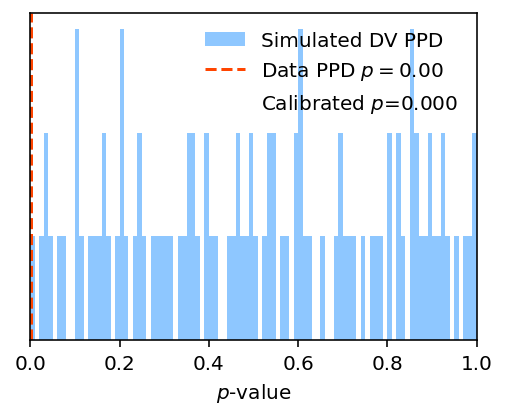

In [11]:
temp = calib.calibrate_pvals(
        path_ppd=path_ppd,
        path_chain=path_chain,
        path_dv=path_dv,
        RUN_NAME=RUN_NAME,
        RUN_NAME_PPD=RUN_NAME_PPD,
        DATAFILE=DATAFILE,
        fiducial_dv=fiducial_dv,
        data_sets_d=['xip','xim', 'gammat','wtheta'],
        data_sets_dprime=['xip','xim', 'gammat','wtheta'],
        N=100, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
        title=RUN_NAME_PPD,
            pval_data=res[0]['full'],
        use_pm=True,
        clip_is=0.1,
        ndraws=1,
        chunks=200,
        size_chunk=1000,
    #     pvals_subsets=res[0],
        #use_logit=(1e-6,1),
        get_zbin_pair_pcal=False,
        pvals_subsets=pvals_subsets,
#         sample_from='fiducial_dv'  # Trying this (different from y1 notebook)
        sample_from='best-fit'  # Trying this (different from y1 notebook)
    )

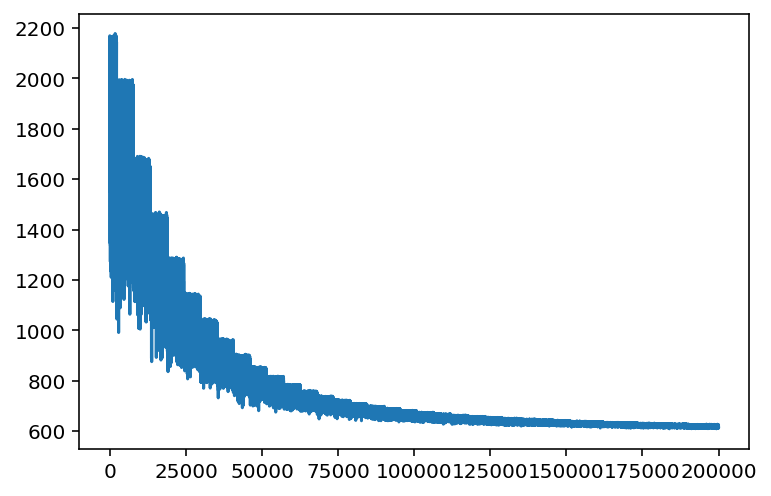

In [60]:
plt.plot(chi2_data_d)

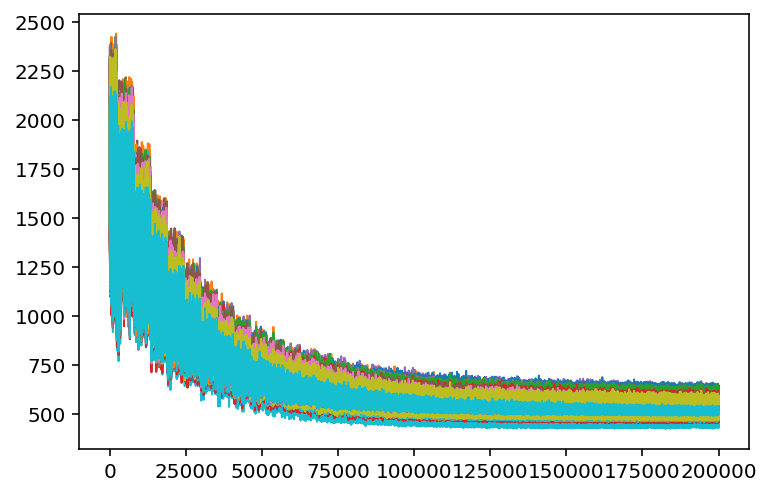

In [62]:
plt.plot(chi2_rsd_d, lw=1);

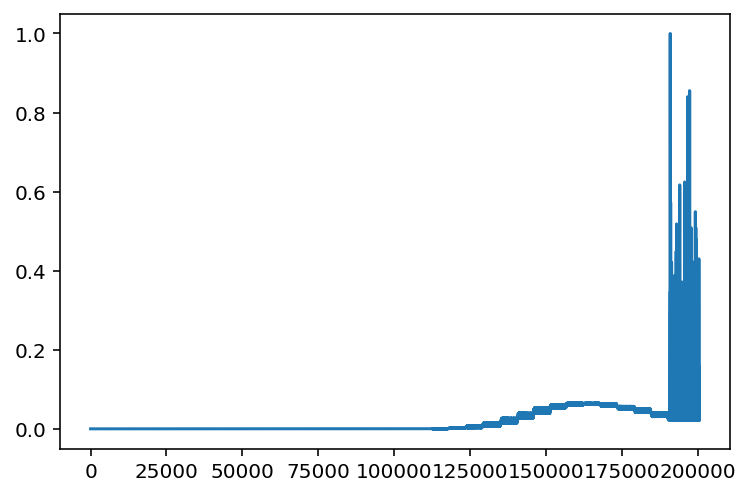

In [58]:
plt.plot(a[:,-1])

In [67]:
w_is = calib._get_is_weight(chi2_rsd_d, chi2_data_d, a[:,-1])

In [87]:
w_is.shape

(200000, 100)

In [74]:
w_is_2 = calib._get_is_weight(chi2_rsd_d, chi2_data_d, a[:,-1], clip=0.1)

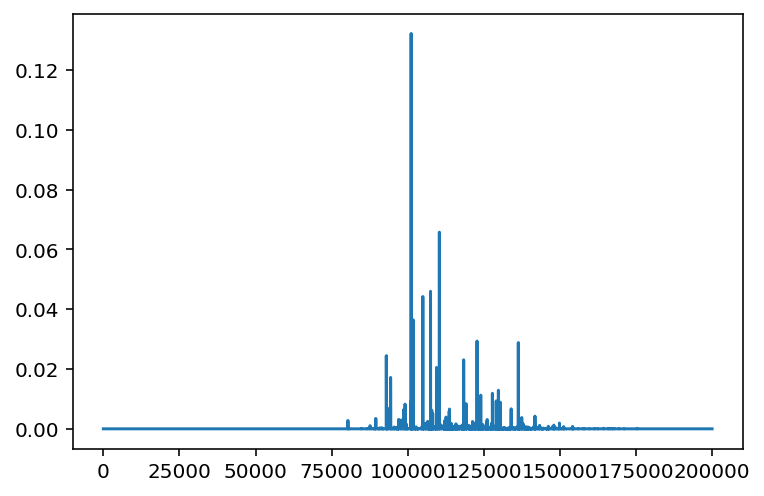

In [71]:
plt.plot(w_is[:,0])

In [75]:
np.sum(w_is_2, axis=0)**2/np.sum(w_is_2**2, axis=0)

array([ 33.74505728, 162.85770116, 466.25963063,  95.4719349 ,
       432.28556751,  44.9982672 , 153.79408518, 345.10551536,
        58.36144681, 232.3169253 , 156.40338688, 435.39150286,
       119.6674795 ,  17.75252443,  35.13960289,  60.10304476,
        57.54824498,  49.91631561,  68.96288319,  48.28633664,
        30.81083385, 157.22111696,  68.02342073, 300.60381479,
        63.01155167, 176.08640023, 317.84912108,  76.85655266,
        39.99357045,  48.08977968, 136.90828012, 185.16654374,
       876.07384871,  13.98356407,  38.45580964,  95.32004409,
        78.09985151, 208.37159499, 110.01625237,  68.24913706,
        76.01537364,  65.49079172,  85.32254895,  89.14501263,
       108.91209542,  53.96129874, 104.00512737, 136.23225191,
       119.52371118,  40.8267398 , 108.96543696,  31.91295919,
        48.59074844,  34.43110962, 248.76632331,  57.39600709,
        27.12705414, 599.28654509,  64.28710616, 199.30029526,
        23.31437928,  61.67978071,  78.47009544,  53.60


###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 21.0 (median), 16th=11.1, 84th=44.3 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
Appending pval for 1x2 0.23520132472204613
2x2
Appending pval for 2x2 0.00018780743109626037
gammat
Appending pval for gammat 0.0012004674632756208
wtheta
Appending pval for wtheta 0.044442849463039676
xim
Appending pval for xim 0.40887941500643915
xip
Appending pval for xip 0.24848476678083134

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0760 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3220 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0470 (raw pval=0.0002)
     - gammat       calibrated pval=0.0900 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1420 (raw pval=0.0444)
     - xim          calibrated pval=0.5100 (raw pval=0.4089)
     - xip          calibrated pval=0.3000 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
#############

Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 20.5 (median), 16th=10.5, 84th=42.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0950 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3160 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0560 (raw pval=0.0002)
     - gammat       calibrated pval=0.1000 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1400 (raw pval=0.0444)
     - xim          calibrated pval=0.5140 (raw pval=0.4089)
     - xip          calibrated pval=0.3160 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 22.2 (median), 16th=11.6, 84th=42.2 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0670 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3070 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0450 (raw pval=0.0002)
     - gammat       calibrated pval=0.0820 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1340 (raw pval=0.0444)
     - xim          calibrated pval=0.5000 (raw pval=0.4089)
     - xip          calibrated pval=0.3140 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 20.8 (median), 16th=10.7, 84th=44.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0830 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3090 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0440 (raw pval=0.0002)
     - gammat       calibrated pval=0.0870 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1250 (raw pval=0.0444)
     - xim          calibrated pval=0.5080 (raw pval=0.4089)
     - xip          calibrated pval=0.3100 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 21.7 (median), 16th=11.1, 84th=44.4 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0780 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3270 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0390 (raw pval=0.0002)
     - gammat       calibrated pval=0.0870 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1330 (raw pval=0.0444)
     - xim          calibrated pval=0.4980 (raw pval=0.4089)
     - xip          calibrated pval=0.3270 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 20.9 (median), 16th=11.2, 84th=40.5 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.1010 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3360 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0560 (raw pval=0.0002)
     - gammat       calibrated pval=0.0950 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1530 (raw pval=0.0444)
     - xim          calibrated pval=0.5290 (raw pval=0.4089)
     - xip          calibrated pval=0.3190 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 21.4 (median), 16th=11.4, 84th=45.6 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0840 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3340 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0520 (raw pval=0.0002)
     - gammat       calibrated pval=0.0940 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1350 (raw pval=0.0444)
     - xim          calibrated pval=0.5050 (raw pval=0.4089)
     - xip          calibrated pval=0.3120 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 21.4 (median), 16th=10.5, 84th=44.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0850 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3310 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0440 (raw pval=0.0002)
     - gammat       calibrated pval=0.0890 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1220 (raw pval=0.0444)
     - xim          calibrated pval=0.5240 (raw pval=0.4089)
     - xip          calibrated pval=0.3110 (raw pval=0.2485)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading list chain at
../fiducial_3x2_goodnessoffit/ppd_chain_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--

Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 529
 - number of realizations = 1000
Loading realizations from  ../fiducial_3x2_goodnessoffit/ppd_3x2lcdm_0321_boosted_fiducial_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 529
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.329
cosmological_parameters--h0 = 0.662
cosmological_parameters--omega_b = 0.0363
cosmological_parameters--n_s = 0.935
cosmological_parameters--a_s = 1.9e-09
cosmological_parameters--omnuh2 = 0.00444
shear_calibration_parameters--m1 = -0.00537
shear_calibration_parameters--m



###############################
## Compute IS weights for d ###
###############################



(200000, 1000)
Neff = 22.1 (median), 16th=11.1, 84th=41.9 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0830 (raw pval=0.0013)
     - 1x2          calibrated pval=0.3150 (raw pval=0.2352)
     - 2x2          calibrated pval=0.0470 (raw pval=0.0002)
     - gammat       calibrated pval=0.0830 (raw pval=0.0012)
     - wtheta       calibrated pval=0.1360 (raw pval=0.0444)
     - xim          calibrated pval=0.5130 (raw pval=0.4089)
     - xip          calibrated pval=0.3010 (raw pval=0.2485)

###############################
## Plotting ###################
###############################



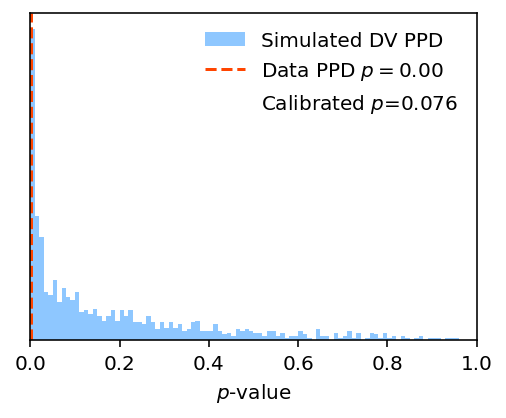

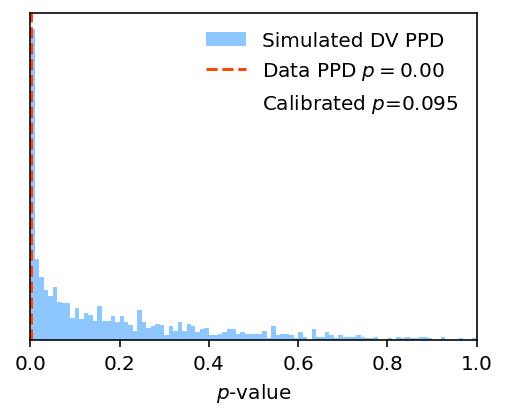

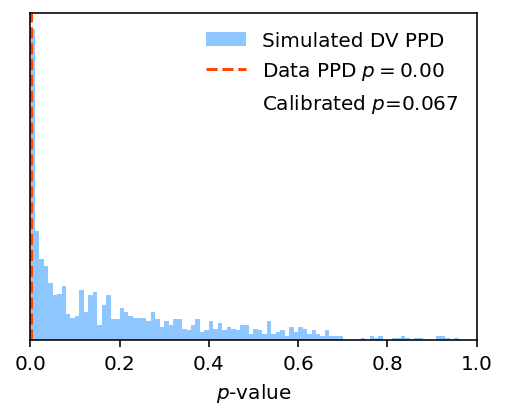

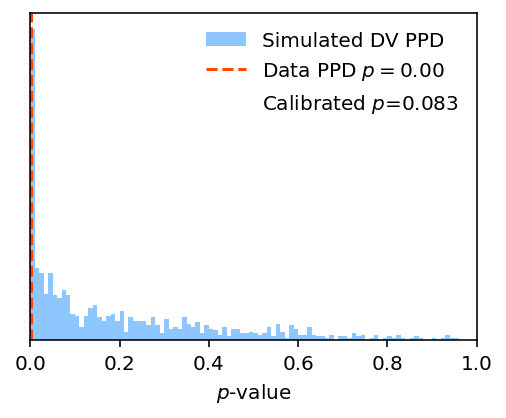

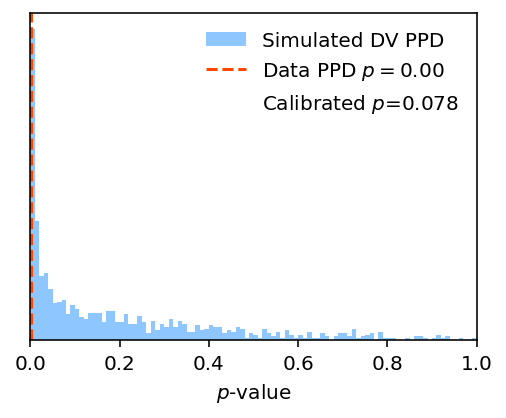

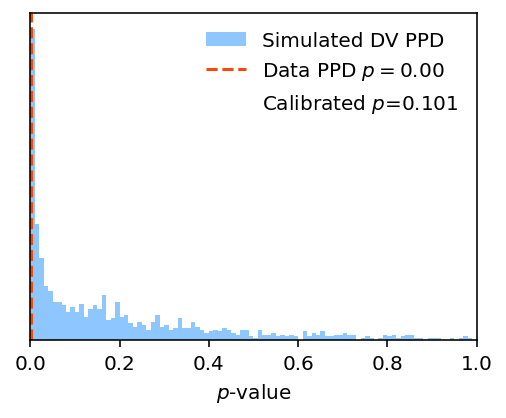

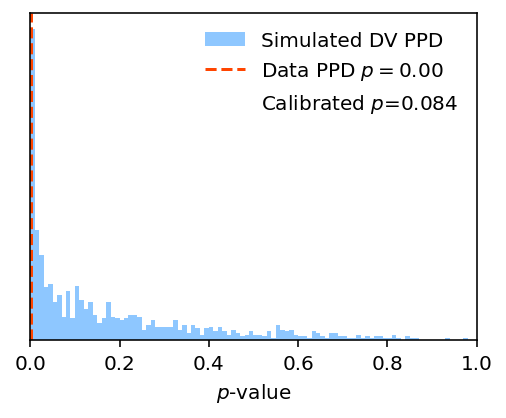

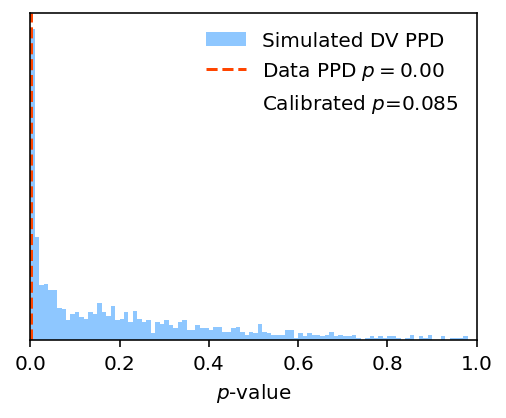

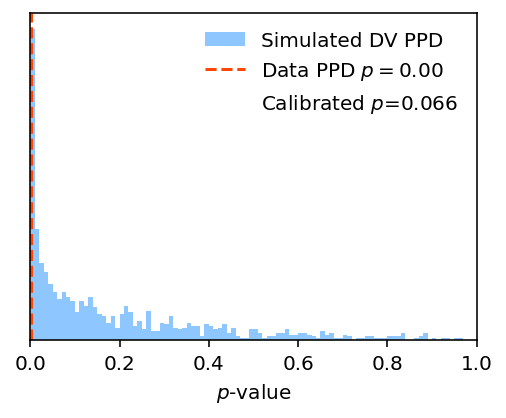

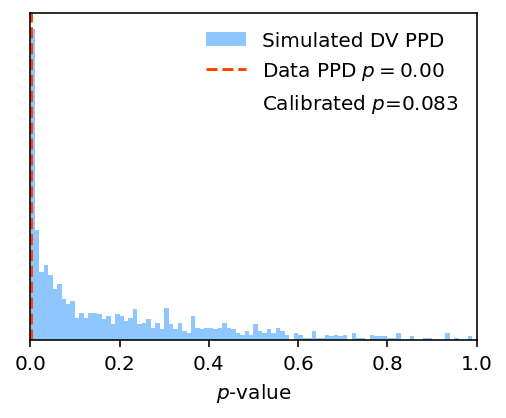

In [33]:
res_pcal = []

pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

for _ in trange(10):
    #blockPrint()
    temp = calib.calibrate_pvals(
        path_ppd=path_ppd,
        path_chain=path_chain,
        path_dv=path_dv,
        RUN_NAME=RUN_NAME,
        RUN_NAME_PPD=RUN_NAME_PPD,
        DATAFILE=DATAFILE,
        fiducial_dv=fiducial_dv,
        data_sets_d=['xip','xim', 'gammat','wtheta'],
        data_sets_dprime=['xip','xim', 'gammat','wtheta'],
        N=1000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
        title=RUN_NAME_PPD,
            pval_data=res[0]['full'],
#         use_pm=True,
        use_pm=False,
        clip_is=0.1,
        ndraws=1,
        chunks=200,
        size_chunk=1000,
    #     pvals_subsets=res[0],
        #use_logit=(1e-6,1),
        get_zbin_pair_pcal=False,
        pvals_subsets=pvals_subsets,
#         sample_from='fiducial_dv'  # Trying this (different from y1 notebook)
        sample_from='best-fit'  # Trying this (different from y1 notebook)
    )
    res_pcal.append(temp)
    #enablePrint()
    pickle.dump(res_pcal, open('res_pcal_'+RUN_NAME_PPD+'.pickle', 'wb'))
    

### Without pm

In [34]:
pvals_rsd = np.concatenate([r[0] for r in res_pcal])

In [35]:
pvals_rsd.shape

(10000,)

0.0826


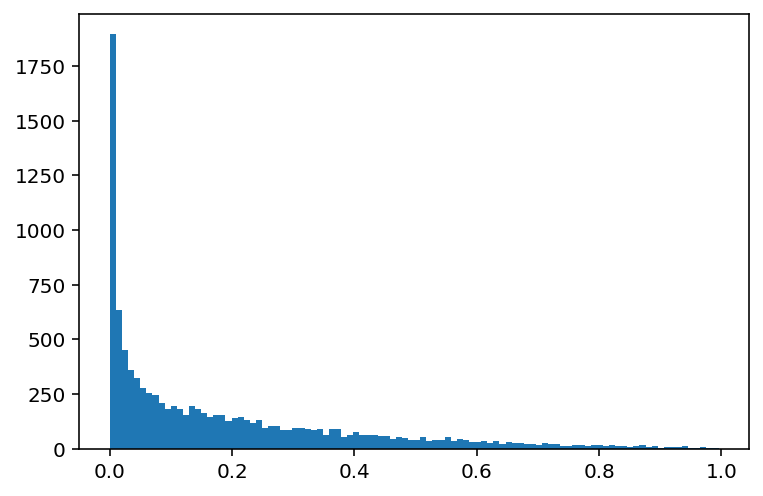

In [36]:
plt.hist(pvals_rsd, 100);
print(np.sum(pvals_rsd<=0.0013)/10000)

xip 0.24848476678083134 0.3106
xim 0.40887941500643915 0.5128
gammat 0.0012004674632756208 0.09
wtheta 0.044442849463039676 0.1368
1x2 0.23520132472204613 0.3226
2x2 0.00018780743109626037 0.0475


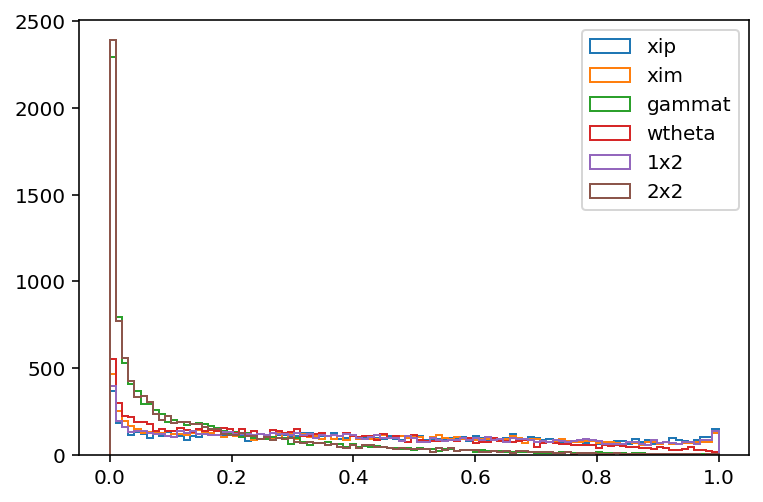

In [37]:
for key in pvals_subsets.keys():
    _p = np.concatenate([r[1][key] for r in res_pcal])
    print(key, pvals_subsets[key], np.sum(_p<=pvals_subsets[key])/len(_p))
    plt.hist(_p, np.linspace(0,1,100), histtype='step', label=key);
plt.legend()

### With pm

In [ ]:
pvals_rsd = np.concatenate([r[0] for r in res_pcal])

In [21]:
pvals_rsd.shape

(10000,)

0.0054


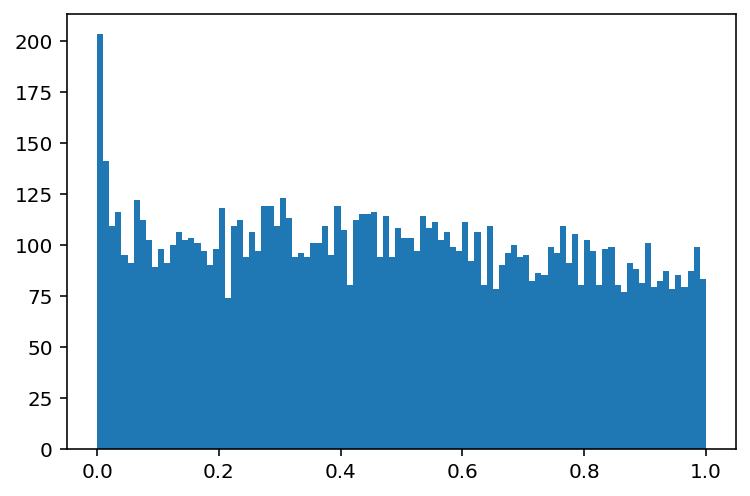

In [26]:
plt.hist(pvals_rsd, 100);
print(np.sum(pvals_rsd<=0.0013)/10000)

xip 0.25343558807428934 0.26
xim 0.4086862998541982 0.4101
gammat 0.004281422921341475 0.0294
wtheta 0.044395811676178364 0.0413
1x2 0.237653351766374 0.2424
2x2 0.057858733984018126 0.0013


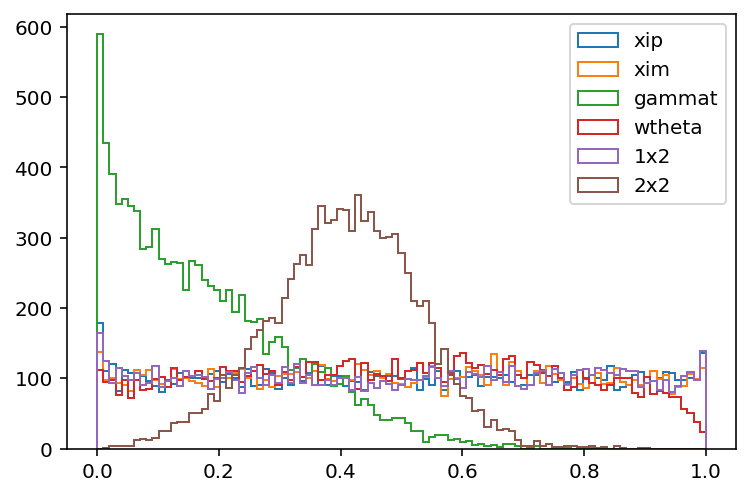

In [32]:
for key in pvals_subsets.keys():
    _p = np.concatenate([r[1][key] for r in res_pcal])
    print(key, pvals_subsets[key], np.sum(_p<=pvals_subsets[key])/len(_p))
    plt.hist(_p, np.linspace(0,1,100), histtype='step', label=key);
plt.legend()

In [ ]:
pvals_rsd = np.concatenate([r[0] for r in res_pcal])

In [21]:
pvals_rsd.shape

(10000,)

0.0054


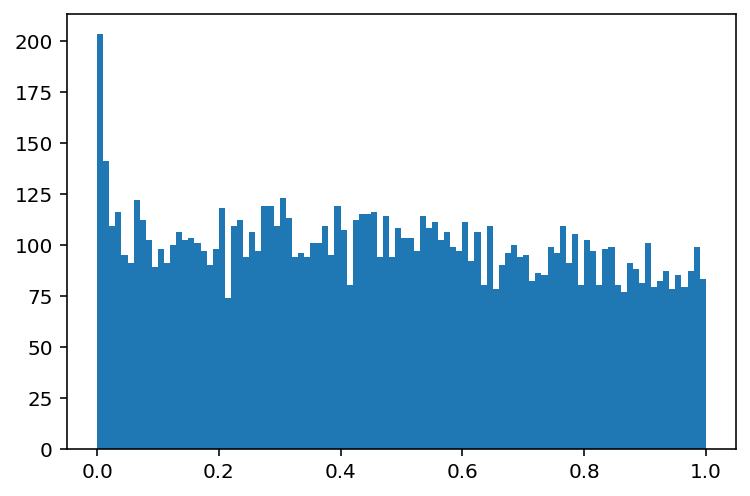

In [26]:
plt.hist(pvals_rsd, 100);
print(np.sum(pvals_rsd<=0.0013)/10000)

xip 0.25343558807428934 0.26
xim 0.4086862998541982 0.4101
gammat 0.004281422921341475 0.0294
wtheta 0.044395811676178364 0.0413
1x2 0.237653351766374 0.2424
2x2 0.057858733984018126 0.0013


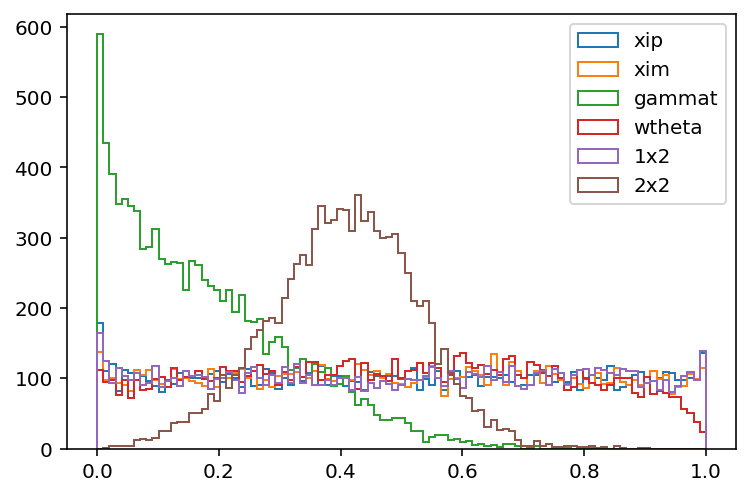

In [32]:
for key in pvals_subsets.keys():
    _p = np.concatenate([r[1][key] for r in res_pcal])
    print(key, pvals_subsets[key], np.sum(_p<=pvals_subsets[key])/len(_p))
    plt.hist(_p, np.linspace(0,1,100), histtype='step', label=key);
plt.legend()

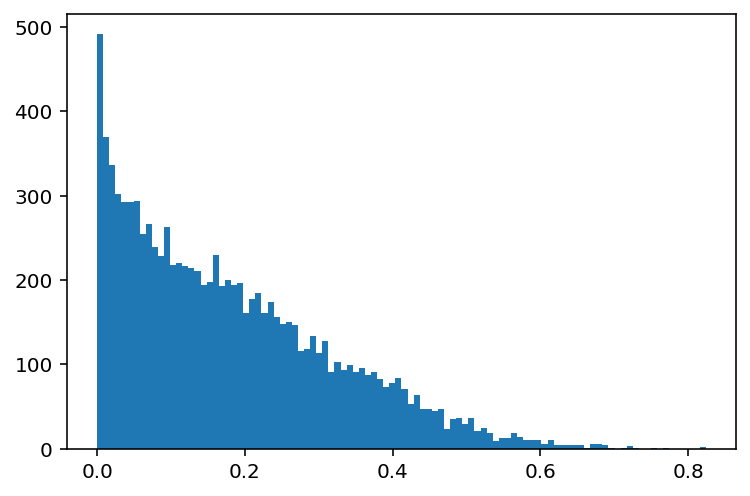

In [23]:
plt.hist(np.concatenate([r[1]['gammat'] for r in res_pcal]), 100);

In [ ]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

In [ ]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)